In [10]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 분리도구
from sklearn.model_selection import train_test_split

# 모델 불러오기 -> 의사결정나무 분류모델
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터 불러오기
data = pd.read_csv('data/mushroom.csv')

data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# 데이터의 크기 확인
data.shape
# 8124개의 데이터
# 22개의 입력특성 + 1개의 정답데이터
# 총 23개의 컬럼

(8124, 23)

In [4]:
# 데이터의 정보 확인
data.info()
# 1. 결측치여부 확인 -> 결측치 없음!

# 2. 데이터타입 object
# 사이킷런의 알고리즘은 문자열 값을 입력값으로 받지 않음!
# 수치형 데이터로 변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 문제와 정답으로 분리
- 문제 데이터 X(특성, 속성, 피처, 독립변수) : poisonous컬럼을 제외한 다른 모든 컬럼
- 정답 데이터 y(정답, 라벨, 레이블, 타겟, 종속변수) : poisonous 컬럼

In [5]:
X = data.drop('poisonous', axis = 1)
y = data['poisonous']

In [6]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

### 데이터 전처리
- 문자열 데이터 -> 수치형(인코딩 encoding)

In [7]:
# 정답 데이터 확인
y.value_counts()
# 두개의 클래스(정답종류)를 가진다

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [8]:
# 기술통계량 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [11]:
# 원핫 인코딩 : 값의 크고작음에 의미가 없을 때 사용(우선순위가 없을 때)
X_one_hot = pd.get_dummies(X, dtype='int64')

X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


#### train, test 데이터 분리

In [17]:
# 분리비율 7:3, 고정규칙 (random_state = )
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=2)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5686, 117) (5686,)
(2438, 117) (2438,)


### 모델링
1. 모델 객체 생성
2. 모델 학습
3. 모델 평가

In [19]:
# 모델 객체 생성 /하이퍼파라미터 조절하지 않음
tree_model = DecisionTreeClassifier()

In [22]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# 모델 평가
tree_model.score(X_train, y_train)
# 1.0 과대적합 아닐까?

1.0

In [25]:
tree_model.score(X_test, y_test)
# 모델 성능 평가가 매우 잘 나오는 특이한 데이터
# 냄새

1.0

#### 하이퍼파라미터를 조절한 모델링

In [26]:
# 모델 객체 생성 
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [28]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
tree_model2.score(X_train,y_train)

0.9857544846992613

In [31]:
tree_model2.score(X_test,y_test)

0.9840032813781788

In [ ]:
# 우리가 보유한 데이터는 한정적임 : 데이터가 많을수록 과대적합 제어

In [32]:
# 교차검증 도구 불러오기
from sklearn.model_selection import cross_val_score

In [33]:
# cross_val_score(모델명, X_train, y_train, cv = 교차검증횟수)
cross_val_score(tree_model, X_train, y_train, cv = 5)

array([1.        , 0.99912049, 1.        , 1.        , 1.        ])

In [35]:
cross_val_score(tree_model2, X_train, y_train, cv = 5)

# 교차검증으로 성능 평가만 해줌

array([0.98594025, 0.98592788, 0.98416887, 0.98416887, 0.98592788])

### 트리모델 내부 시각화
- 외부 라이브러리인 graphviz

In [36]:
# 외부 라이브러리 설치
!pip install graphviz

In [37]:
# graph 경로 잡기!
import os # 파이썬이 운영체제와 상호작용할 수 있도록 도와주는 모듈

os.environ['PATH'] += os.pathsep+'C:/Program Files/Graphviz/bin'
# PATH 환경변수 안에, 'C:/Program Files/Graphviz/bin' 추가
# dot.exe 사용하기 위해

In [39]:
# 현재 우리가 만든 모델을 dot형태의 파일로 내보내기
from sklearn.tree import export_graphviz 

export_graphviz(
    tree_model, # 모델
    out_file = 'data/tree.dot', # 저장할 경로/파일명
    class_names=['독', '식용'], # 정답데이터의 이름 설정
    feature_names= X_one_hot.columns, # 원핫인코딩된 컬럼이름으로
    filled = True, # 각 노드들의 클래스가 구분되도록 색을 칠해주는 작업 여부
    impurity= True # 지니 불순도 출력 여부
    
)

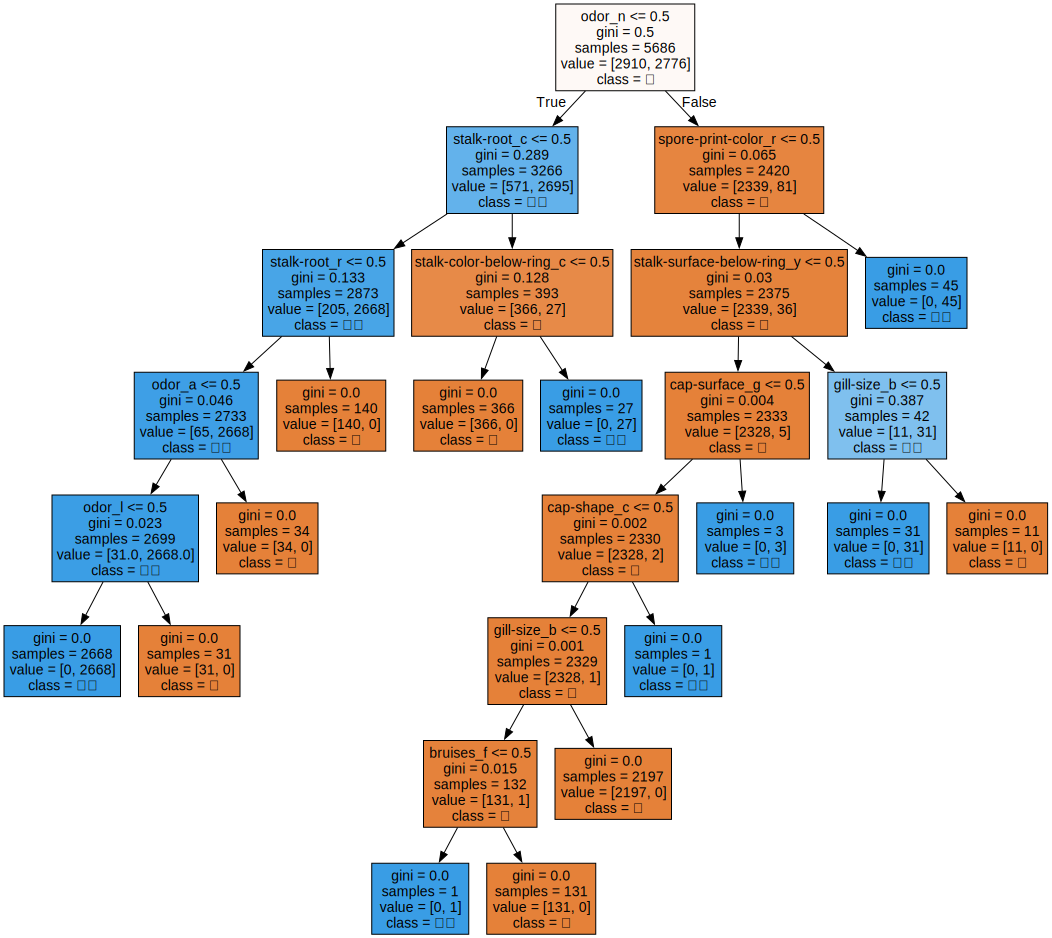

In [40]:
# dot 파일을 불러와서 실제 그래프로 표현
import graphviz
# 클래스 이름을 한글로 했기 때문에, 한글 인코딩 작업

with open('data/tree.dot', encoding = 'UTF-8') as f:  # f 약어 주기
    dot_graph = f.read()

# 그래프를 출력
graphviz.Source(dot_graph)

In [41]:
# tree_model2를 .dot 파일로 내보내기, file 이름을 tree.dot -> tree2.dot

export_graphviz(
    tree_model2, # 모델
    out_file = 'data/tree2.dot', # 저장할 경로/파일명
    class_names=['독', '식용'], # 정답데이터의 이름 설정
    feature_names= X_one_hot.columns, # 원핫인코딩된 컬럼이름으로
    filled = True, # 각 노드들의 클래스가 구분되도록 색을 칠해주는 작업 여부
    impurity= True # 지니 불순도 출력 여부
    
)

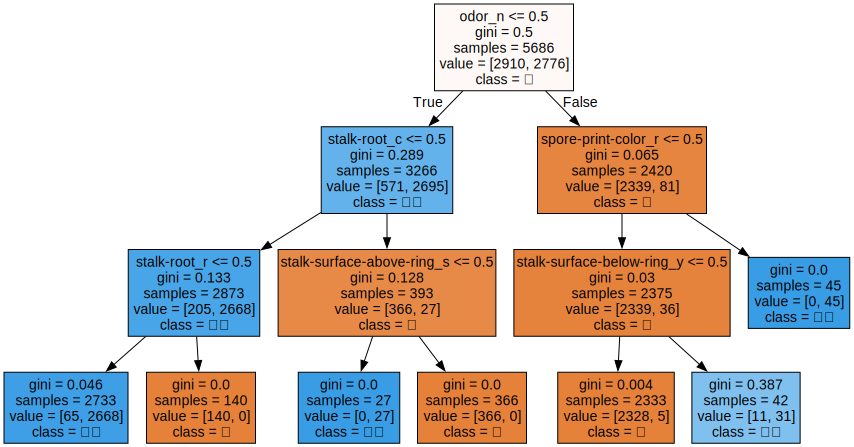

In [56]:
# tree2.dot 파일을 불러와서 실제 그래프로 표현하기

with open('data/tree2.dot', encoding = 'UTF-8') as f:  # f 약어 주기
    dot_graph = f.read()

# 그래프를 출력
graphviz.Source(dot_graph)

In [ ]:
# 왜 117개의 특성 중, odor_n을 첫번째 질문을 했을까?
# 117개의 입력특성들이 가지는 중요도를 살펴보자.

### 특성 선택
- 각 특성들의 중요도를 출력(지도학습에서 가능)
- 정답에 얼마만큼의 영향을 미치는 특성인가를 수치로 확인 가능
- 각 특성들의 중요도는 0~1 사이의 값을 가짐
- 모든 특성의 중요도의 합은 1
- tree모델은 특성의 중요도가 높은 값을 상위질문으로 배치한다.

In [52]:
pd.set_option('display.max_rows', None)
# 판다스 디스플레이 옵션변경 (행 다 보이게)

In [45]:
# tree model의 특성 중요도 확인
fi = tree_model.feature_importances_
fi

array([0.        , 0.00070297, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00210529, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00069854, 0.        , 0.02309418, 0.        , 0.        ,
       0.02156945, 0.        , 0.61324985, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00571981, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17994777, 0.        ,
       0.08933442, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01572874, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01769

In [53]:
# 중요도를 DataFrame화 해주기
fi_df = pd.DataFrame(fi, index = X_one_hot.columns, columns = ['특성중요도'])

fi_df

,특성중요도
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
cap-surface_f,0.000000
cap-surface_g,0.002105
cap-surface_s,0.000000
cap-surface_y,0.000000


In [54]:
# 특성 중요도를 확인하기 위해 데이터를 내림차순 정렬
fi_df.sort_values('특성중요도', ascending=False)

,특성중요도
odor_n,0.613250
stalk-root_c,0.179948
stalk-root_r,0.089334
spore-print-color_r,0.030150
odor_a,0.023094
odor_l,0.021569
stalk-color-below-ring_c,0.017699
stalk-surface-below-ring_y,0.015729
gill-size_b,0.005720
cap-surface_g,0.002105


## 정리
- tree모델 내부 시각화 표를 보면, 중요도가 높은 특성 odor_n이 최상단 질문으로 배치되어 있음을 확인
- 중요도가 가장 높은 특성을 먼저 고려해야 한다.(불순도가 낮아지는 방향으로 학습)
- 현재 mushroom데이터는 하나의 특성이 60%가 넘는 중요도를 가지고 있기 때문에, 학습도 용이했고, 정확도 높았음.